Project 1 Classification Using ANN



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Deep Learning Project/Classification Using ANN")

In [ ]:
import numpy as np
import pandas as pd

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

#for interactive shells
from IPython.display import display

#remove warnnigs
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')


In [ ]:
print(tensorflow.__version__)

2.15.0


IMPORT DATASET

In [ ]:
#IMPORTING TGHE DATASET
df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')


In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#some columns are totally unproductive so let's remove them
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
#some columns have text data so let's one hot encode them
#for more on one hot encoding click this link below
df = pd.get_dummies(prefix="Geo",data=df,columns=['Geography'])

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df=df.replace(to_replace={'Gender': {"Female":1,"Male":0}})

In [ ]:
df.shape

(10000, 13)

In [ ]:
Y=df.Exited
X= df.drop(["Exited"],axis=1)

In [ ]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [ ]:
#feature Scaling because yes we don't have one independent variable dominating others and its make computional easy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#sequential model to intialise our ann and dense module to build the layers
model = Sequential()

#Adding the input layer and the first hidden layer
model.add(Dense(units = 100,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_dim = 12))

#adding the second hidden layer
model.add(Dense(units = 150,
                kernel_initializer = 'uniform',
                activation = 'relu'
                ))

#addinf the third hidden layer
model.add(Dense(units=200,
                kernel_initializer = 'uniform',
                activation= 'relu'))

#adding the output layer
model.add(Dense(units=1,
                kernel_initializer = 'uniform',
                activation = 'sigmoid'))

In [ ]:
#compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 200)               30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 46851 (183.01 KB)
Trainable params: 46851 (183.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title
#Fitting the ANN to the training Set
EPOCHS = 100
Batch_size = 64

# train model
H= model.fit(X_train,
             Y_train,
             batch_size = Batch_size,
             epochs = EPOCHS,
             validation_split = 0.2,
             verbose=1)

Epoch 1/100
84/84 [==============================] - 4s 7ms/step - loss: 0.4860 - accuracy: 0.7957 - val_loss: 0.4254 - val_accuracy: 0.8000
Epoch 2/100
84/84 [==============================] - 0s 5ms/step - loss: 0.4244 - accuracy: 0.8004 - val_loss: 0.4121 - val_accuracy: 0.8269
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 0.4060 - accuracy: 0.8328 - val_loss: 0.3803 - val_accuracy: 0.8440
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.8491 - val_loss: 0.3569 - val_accuracy: 0.8485
Epoch 5/100
84/84 [==============================] - 0s 5ms/step - loss: 0.3526 - accuracy: 0.8563 - val_loss: 0.3461 - val_accuracy: 0.8619
Epoch 6/100
84/84 [==============================] - 0s 5ms/step - loss: 0.3419 - accuracy: 0.8618 - val_loss: 0.3498 - val_accuracy: 0.8560
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8634 - val_loss: 0.3449 - val_accuracy: 0.8612
Epoch 8/100
8

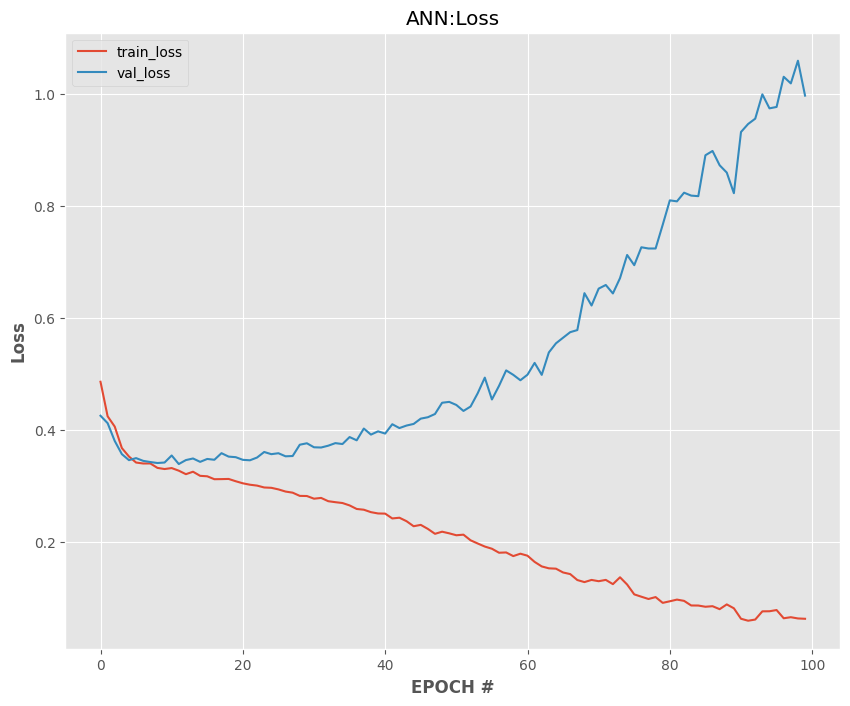

In [ ]:
#plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=[10,8])
plt.plot(N, H.history['loss'],label ='train_loss')
plt.plot(N, H.history['val_loss'],label= 'val_loss')
plt.title("ANN:Loss")
plt.xlabel("EPOCH #",weight='bold')
plt.ylabel("Loss", weight = 'bold')
plt.legend()
plt.show()

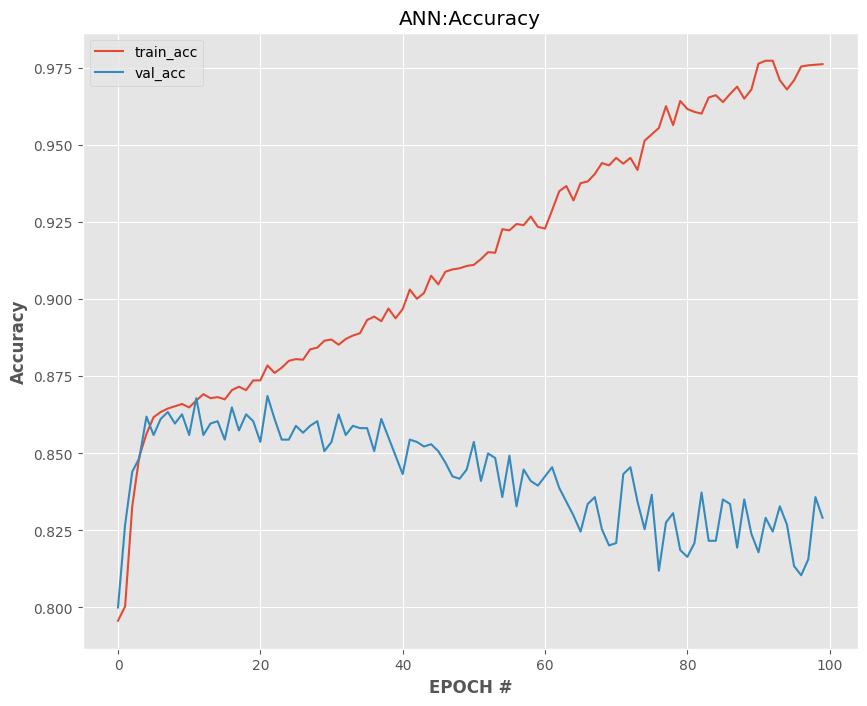

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=[10,8])
plt.plot(N, H.history['accuracy'],label ='train_acc')
plt.plot(N, H.history['val_accuracy'],label= 'val_acc')
plt.title("ANN:Accuracy")
plt.xlabel("EPOCH #",weight='bold')
plt.ylabel("Accuracy", weight = 'bold')
plt.legend()
plt.show()

In [ ]:
#part 3 - making prediction and evaluating the  model

#predicting the test set result
y_pred= model.predict(X_test)
y_pred =(y_pred >0.5)

print('*'*20)
score,acc =model.evaluate(X_test, Y_test,batch_size=10)

print("Test Score :",score)
print("Test accuracy :",acc)

104/104 [==============================] - 0s 2ms/step
********************
330/330 [==============================] - 1s 4ms/step - loss: 1.0493 - accuracy: 0.8212
Test Score : 1.049332857131958
Test accuracy : 0.821212112903595


In [ ]:
#making the confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

[[2342  275]
 [ 315  368]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2617
           1       0.57      0.54      0.56       683

    accuracy                           0.82      3300
   macro avg       0.73      0.72      0.72      3300
weighted avg       0.82      0.82      0.82      3300

Accuracy of the model:  0.8212121212121212


11.Evaluation Metrics

Text(0.5, 23.52222222222222, 'Predicted Label')

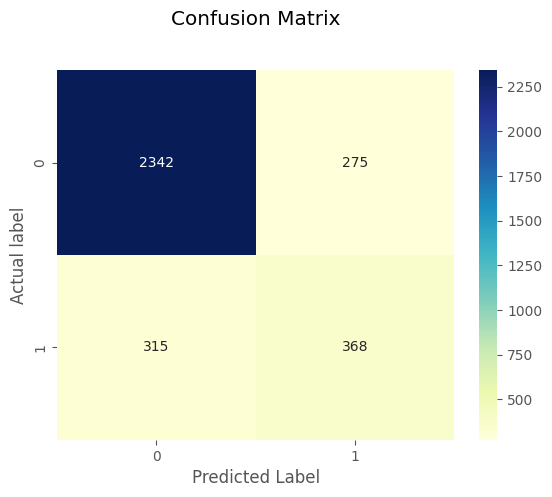

In [ ]:
p = sns.heatmap (pd.DataFrame(cfm), annot= True, cmap ="YlGnBu", fmt='g')
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted Label")


In [ ]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2617
           1       0.57      0.54      0.56       683

    accuracy                           0.82      3300
   macro avg       0.73      0.72      0.72      3300
weighted avg       0.82      0.82      0.82      3300



SyntaxError: invalid character '₹' (U+20B9) (<ipython-input-27-9ee7608377df>, line 1)